In [1]:
import pandas as pd

from flair.data import Corpus
from flair.datasets import CSVClassificationCorpus
from flair.datasets import TREC_6
from flair.embeddings import TransformerDocumentEmbeddings, DocumentPoolEmbeddings
from flair.models import TextClassifier
from flair.trainers import ModelTrainer
from flair.data import Sentence
from flair.models import TARSClassifier
from flair.embeddings import FlairEmbeddings, PooledFlairEmbeddings
from flair.data import Dictionary
from flair.embeddings import FlairEmbeddings
from flair.trainers.language_model_trainer import LanguageModelTrainer, TextCorpus
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score, precision_score, recall_score

import matplotlib.pyplot as plt


In [2]:
classifier = TextClassifier.load("/export/home/aneezahm001/IR/fine-tune/hand-labelled-old-new/twitter-roberta/final-model.pt")

2022-04-05 20:02:01,784 loading file /export/home/aneezahm001/IR/fine-tune/hand-labelled-old-new/twitter-roberta/final-model.pt
2022-04-05 20:02:15,865 No model_max_length in Tokenizer's config.json - setting it to 512. Specify desired model_max_length by passing it as attribute to embedding instance.


In [1]:
test_data = pd.read_csv("./data/inference/all_data.csv", index_col = 0)
test_data.thead()

In [ ]:
#Preprocess tweets and save in new column
inference=[]
i=0
for item in test_data['procesed_content']:
    sentence = Sentence(item)
    classifier.predict(sentence)

    inference += [float(sentence.labels[0].value)]
    
    i += 1
    if i%500==0:
      print(i)
test_data['inference']=inference

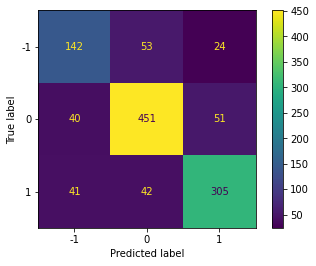

In [28]:
labels = [-1, 0, 1]
cm = confusion_matrix(test_data["sentiment"], test_data["inference"], labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

In [33]:
print(classification_report(test_data["sentiment"], test_data["inference"]))

              precision    recall  f1-score   support

          -1       0.64      0.65      0.64       219
           0       0.83      0.83      0.83       542
           1       0.80      0.79      0.79       388

    accuracy                           0.78      1149
   macro avg       0.76      0.76      0.76      1149
weighted avg       0.78      0.78      0.78      1149



In [12]:
test_data.to_csv("./data/hand-labelled-old-new/inference/test_data_inference.csv")